# Multi-class Classification and Neural Networks

In [115]:
input_layer_size = 400;
num_labels = 10;

load('ex3data1.mat');
m = size(X, 1);
m

m =  5000


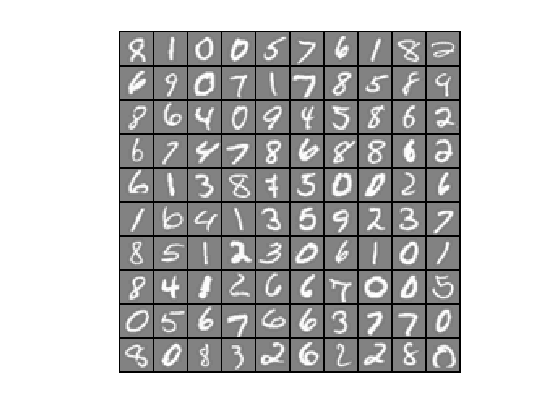

In [104]:
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);
displayData(sel);

## Vectorizing regularized logistic regression

### Cost function

$$
J(\theta) = {1 \over m}\sum_{i=1}^m[
    -y^{(i)}log(h_\theta(x^{(i)}))
    -(1-y^{(i)})log(1 - h_\theta(x^{(i)}))
] + {\lambda \over 2m}\sum_{j = 1}^n\theta_j^2
$$

$$
\begin{eqnarray}
h_\theta(x^{(i)}) & = & g(\theta^Tx^{(i)}) \\
g(z) & = & {1 \over 1 + e^{-z}}
\end{eqnarray}
$$

### Gradient

$$
\begin{eqnarray}
{\partial J(\theta) \over \partial \theta_0}
& = & {1 \over m}\sum_{i = 1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} & \ (for \  j = 0) \\
{\partial J(\theta) \over \partial \theta_j}
& = & ({1 \over m}\sum_{i = 1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)})
 + {\lambda \over m}\theta_j & \ (for\  j \ge 1)
 \end{eqnarray}
$$

In [15]:
function g = sigmoid(z)
    g = 1.0 ./ (1.0 + exp(-z));
endfunction

In [100]:
function [J, grad] = lrCostFunction(theta, X, y, lambda)
    m = length(y);
    J = 0;
    grad = zeros(size(theta));
    
    hx = sigmoid(X * theta);   
    J = sum(-y .* log(hx) - (1 - y) .* log(1 - hx)) ./ m;

    % 正規化項の計算
    % theta(1) は慣例で含めない
    t = theta(2:end, :);
    J = J + sum((t .^ 2)') * lambda / (2 * m);
    
    grad = (X' * (hx - y)) ./ m;
    temp = theta;
    temp(1) = 0;
    grad = grad + temp .* lambda ./ m;
endfunction

## One-vs-all Classification

In [140]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
    m = size(X, 1);
    n = size(X, 2);
    
    all_theta = zeros(num_labels, n + 1);
    X = [ones(m, 1), X];
        
    options = optimset('GradObj', 'on', 'MaxIter', 50);
    
    for c = 1:num_labels
        initial_theta = zeros(n + 1, 1);
        [theta] = fmincg(@(t)(lrCostFunction(t, X, (y == c), lambda)), initial_theta, options);
        
        all_theta(c, :) = theta';
    end
endfunction

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);

Iteration    50 | Cost: 1.398274e-02
Iteration    50 | Cost: 5.725198e-02
Iteration    50 | Cost: 6.395983e-02
Iteration    50 | Cost: 3.817306e-02
Iteration    50 | Cost: 6.151541e-02
Iteration    50 | Cost: 2.198233e-02
Iteration    50 | Cost: 3.606468e-02
Iteration    50 | Cost: 8.551387e-02
Iteration    50 | Cost: 7.939720e-02
Iteration    50 | Cost: 9.842298e-03


## One-vs-all Prediction

* 期待する結果: 94.9%

In [167]:
function p = predictOneVsAll(all_theta, X)
    m = size(X, 1);
    num_labels = size(all_theta, 1);
    p = zeros(m, 1);
    X = [ones(m, 1), X];
    
    hx = sigmoid(X * all_theta');
    [mhx, c] = max(hx, [], 2);
    p = c;
endfunction

pred = predictOneVsAll(all_theta, X);
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 94.920000
